### Задача - 2
#### Имя - Хурматулла  ----- Фамилия - Карими ------ Группа - 22.М07-мм

В этом файле я решил: Числа (1,3,4,5,6,7,8,9,10) но я решил номер 2 в другом файле.

In [1]:
#импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Считывание данных

In [2]:
datasets = pd.read_csv('train.csv')
datasets.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


### Очистка данных & EDA

In [3]:
datasets.Education=datasets.Education.map({'Graduate':1,'Not Graduate':0})
datasets['Education'].value_counts()

1    480
0    134
Name: Education, dtype: int64

In [4]:
datasets.Married=datasets.Married.map({'Yes':1,'No':0})
datasets['Married'].value_counts()

1.0    398
0.0    213
Name: Married, dtype: int64

In [5]:
datasets.Dependents=datasets.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
datasets.Dependents.value_counts()

0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64

In [6]:
datasets.Gender=datasets.Gender.map({'Male':1,'Female':0})
datasets['Gender'].value_counts()

1.0    489
0.0    112
Name: Gender, dtype: int64

In [7]:
datasets.Credit_History.size

614

In [8]:
datasets.Credit_History.fillna(np.random.randint(0,2),inplace=True)
datasets.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
datasets.Married.fillna(np.random.randint(0,2),inplace=True)
datasets.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
datasets.LoanAmount.fillna(datasets.LoanAmount.median(),inplace=True)
datasets.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
datasets.Loan_Amount_Term.fillna(datasets.Loan_Amount_Term.mean(),inplace=True)
datasets.isnull().sum()

Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
datasets.Gender.fillna(np.random.randint(0,2),inplace=True)
datasets.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
datasets.Dependents.fillna(datasets.Dependents.median(),inplace=True)
datasets.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
datasets.Self_Employed.fillna(np.random.randint(0,2),inplace=True)
datasets.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    float64
 2   Married            614 non-null    float64
 3   Dependents         614 non-null    float64
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(3), object(3)
memory usage: 62.5+ KB


In [16]:
datasets.describe()

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.781759,5403.459283,1621.245798,145.752443,342.000000,0.773616,0.687296
std,0.386497,0.476373,1.009623,0.413389,6109.041673,2926.248369,84.107233,64.372489,0.418832,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,1.000000


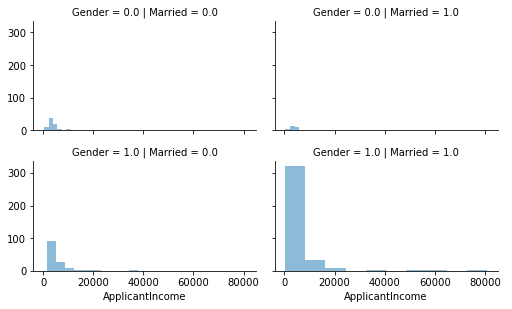

In [17]:
grid = sns.FacetGrid(datasets, row='Gender', col='Married', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

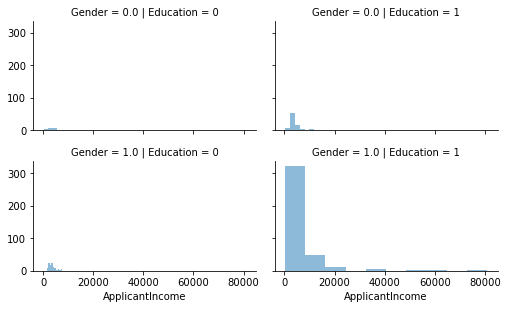

In [18]:
grid = sns.FacetGrid(datasets, row='Gender', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

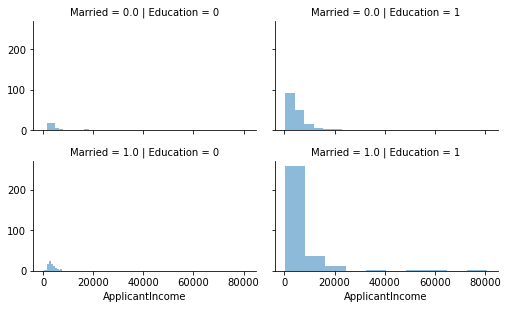

In [19]:
grid = sns.FacetGrid(datasets, row='Married', col='Education', size=2.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

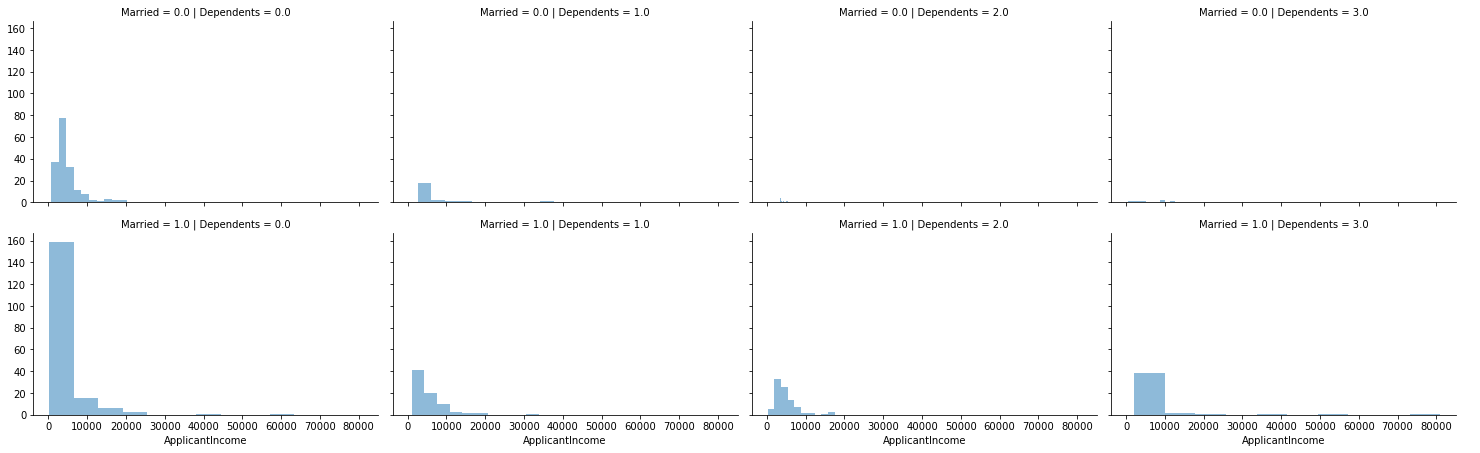

In [20]:
grid = sns.FacetGrid(datasets, row='Married', col='Dependents', size=3.2, aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins=10)
grid.add_legend()

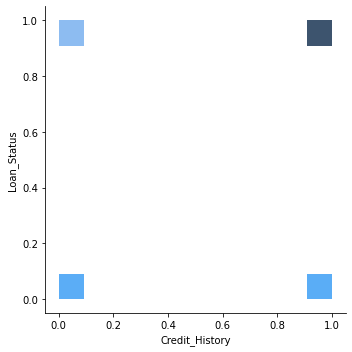

In [21]:
sns.displot(x = 'Credit_History', y = 'Loan_Status', data=datasets)

In [22]:
datasets['Credit_History'].value_counts()

1.0    475
0.0    139
Name: Credit_History, dtype: int64

In [23]:
datasets['ApplicantIncome'].value_counts()

2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64

In [24]:
datasets['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [25]:
datasets['CoapplicantIncome'].value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

In [26]:
#Отображение строки и столбца данных
datasets.shape

(614, 13)

In [27]:
checking_empty_value = pd.isnull(datasets)
checking_empty_value

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


<Figure size 2160x2160 with 0 Axes>

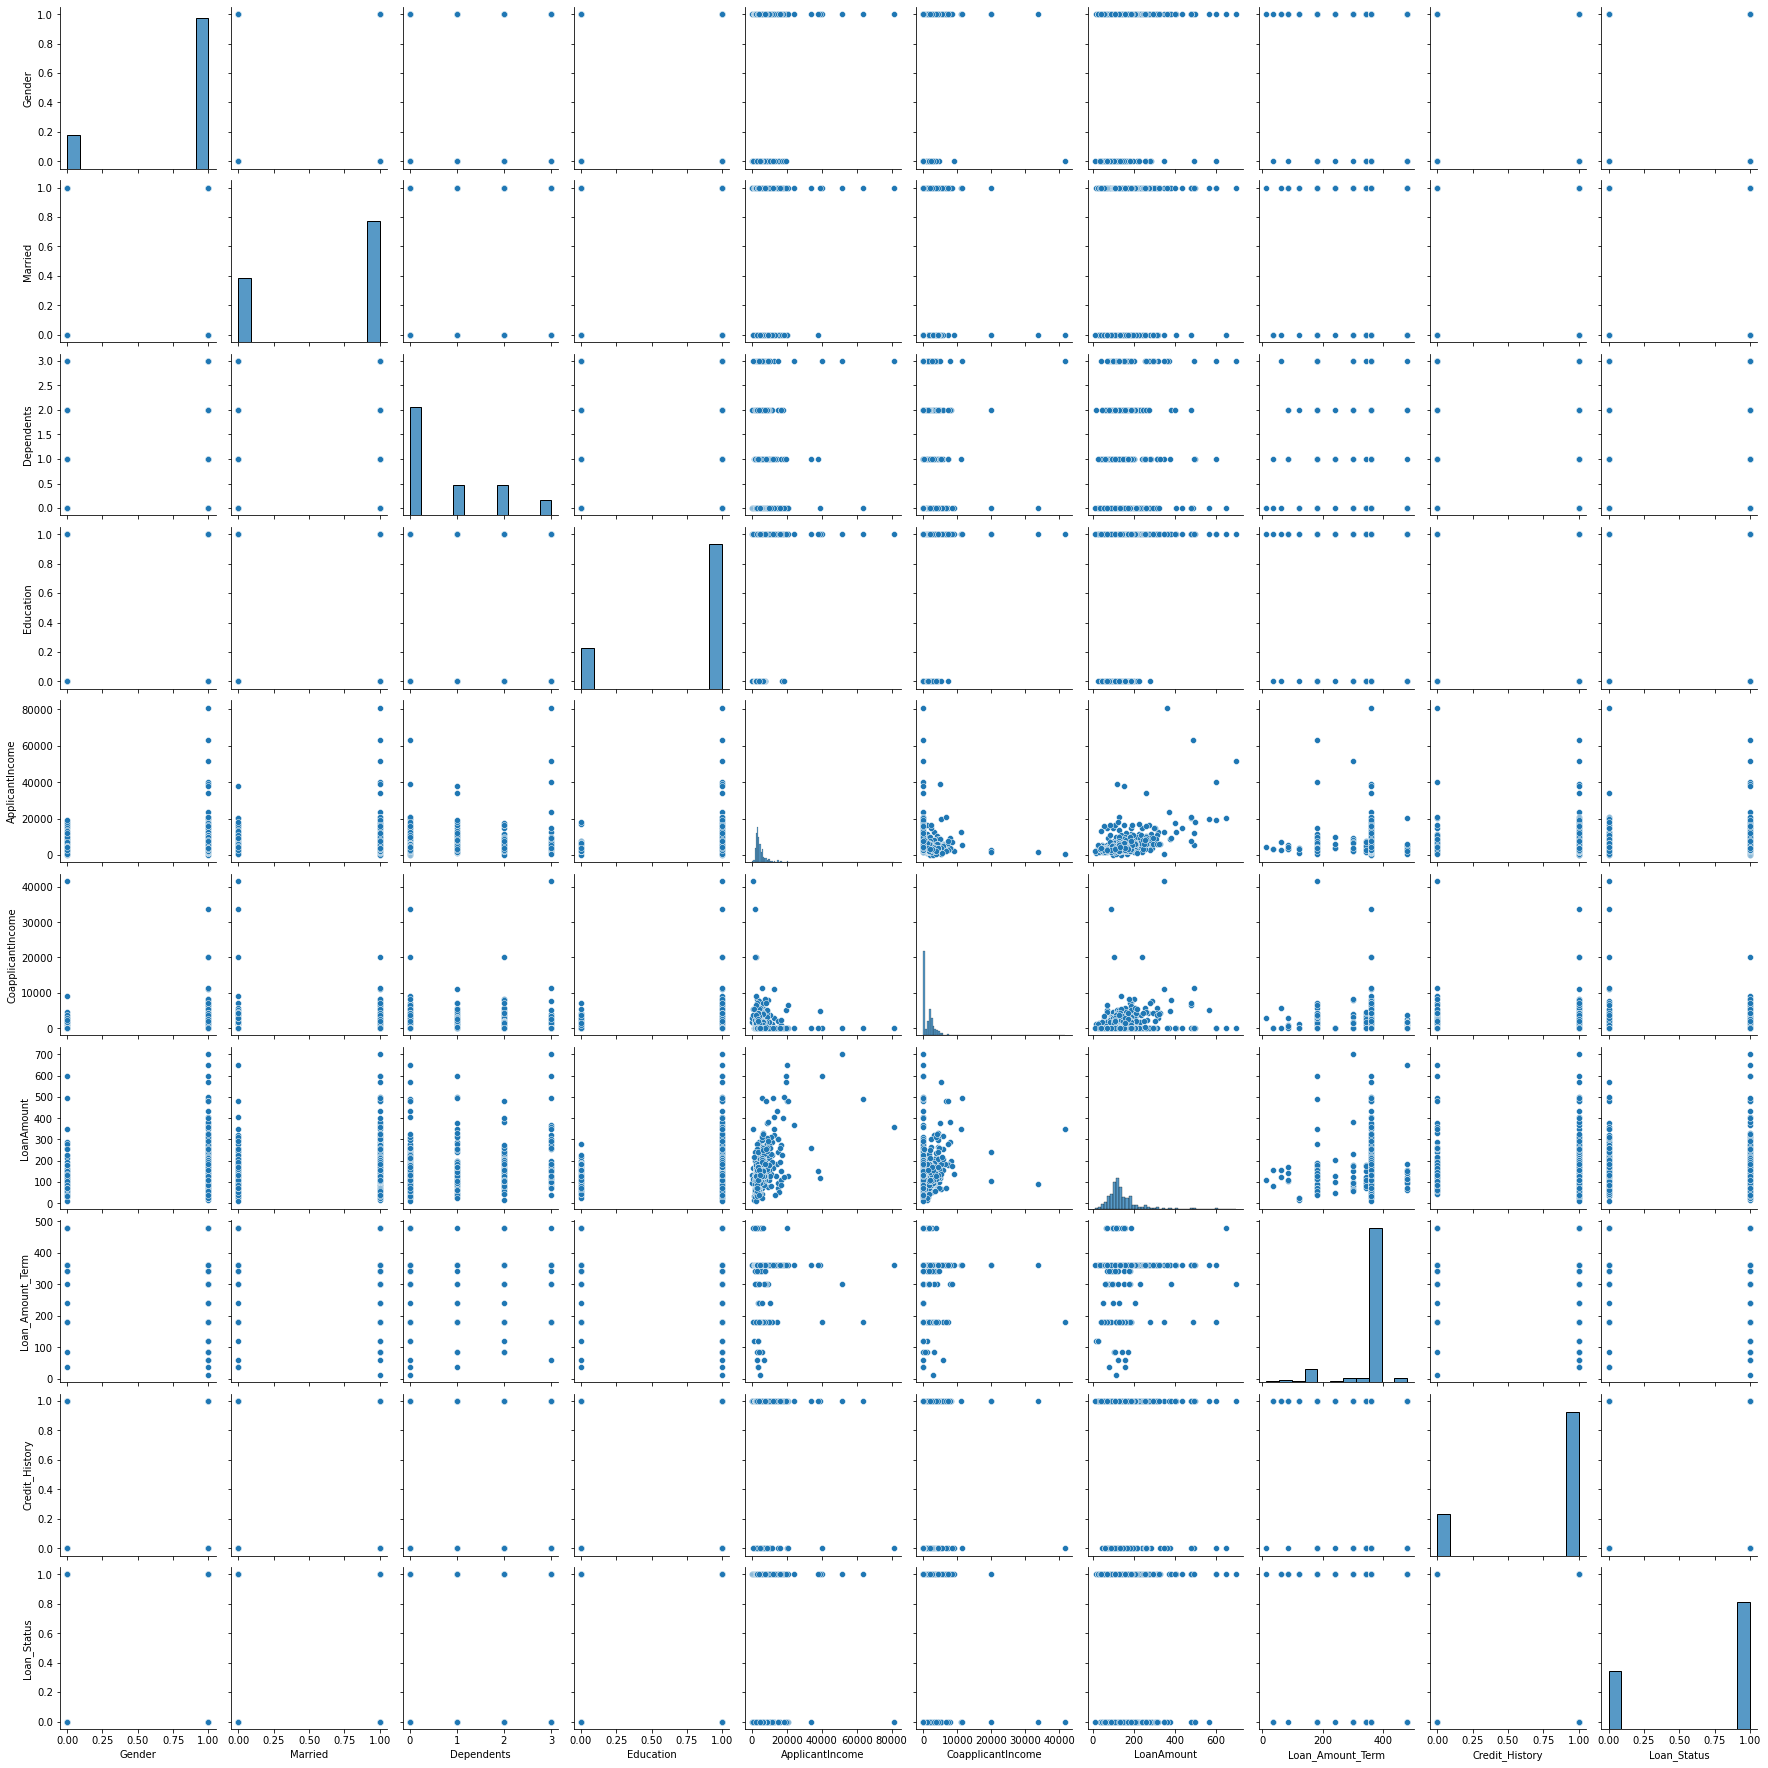

In [28]:
plt.figure(figsize = (30,30))
sns.pairplot(datasets)
plt.show()

In [29]:
numeric_columns = datasets.select_dtypes(include =['int64','float64'])
numeric_columns.head()

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1.0,0.0,0.0,1,5849,0.0,128.0,360.0,1.0,1
1,1.0,1.0,1.0,1,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,3000,0.0,66.0,360.0,1.0,1
3,1.0,1.0,0.0,0,2583,2358.0,120.0,360.0,1.0,1
4,1.0,0.0,0.0,1,6000,0.0,141.0,360.0,1.0,1


### Корреляция признаков

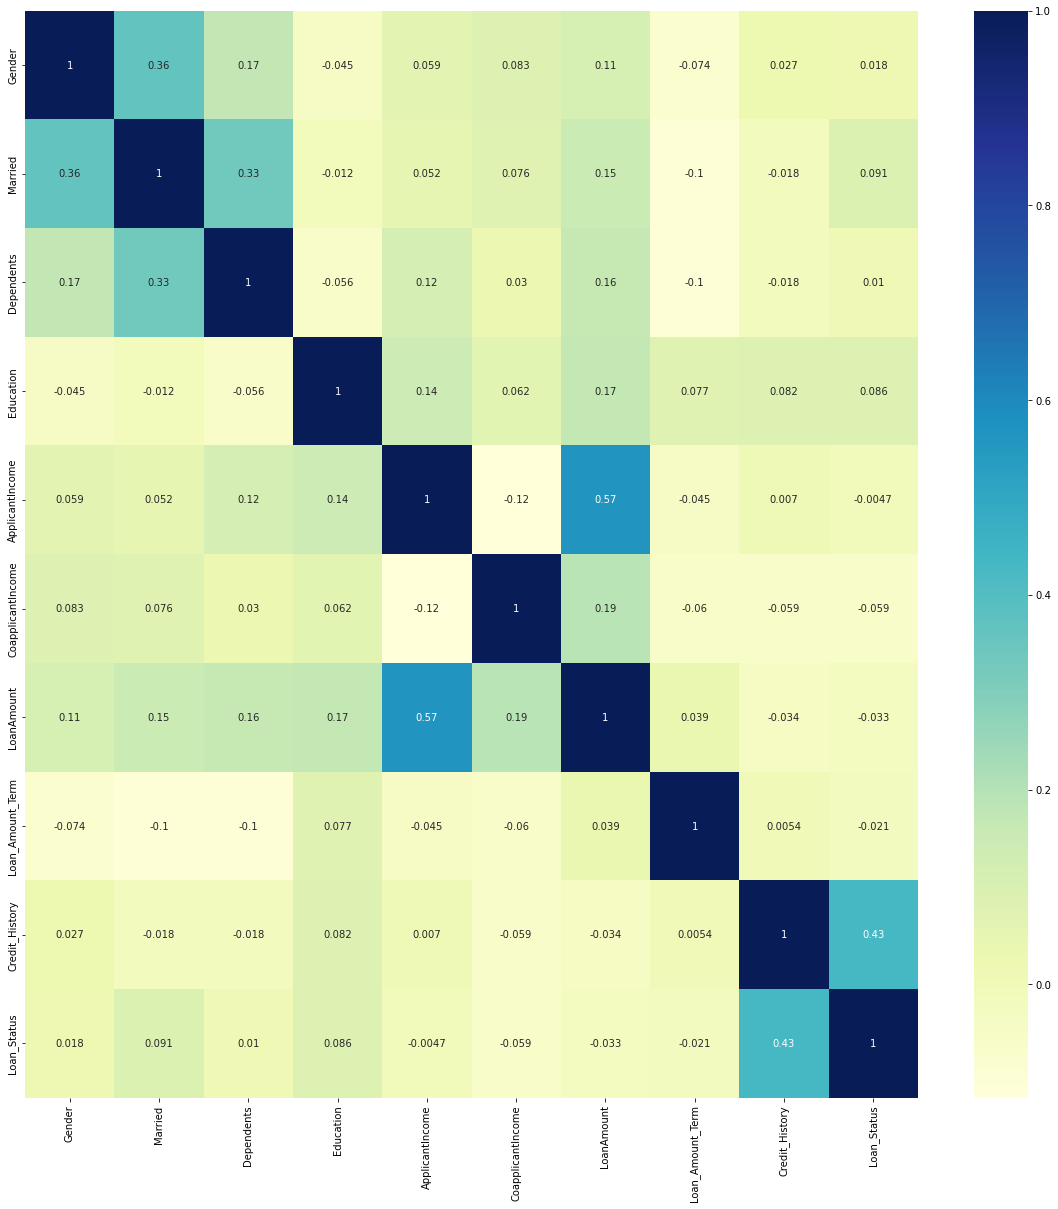

In [30]:
plt.figure(figsize = (20,20))
sns.heatmap(datasets.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [31]:
categorical_cols = datasets.select_dtypes(include=['object'])
categorical_cols.head()

,Loan_ID,Self_Employed,Property_Area
0,LP001002,No,Urban
1,LP001003,No,Rural
2,LP001005,Yes,Urban
3,LP001006,No,Urban
4,LP001008,No,Urban


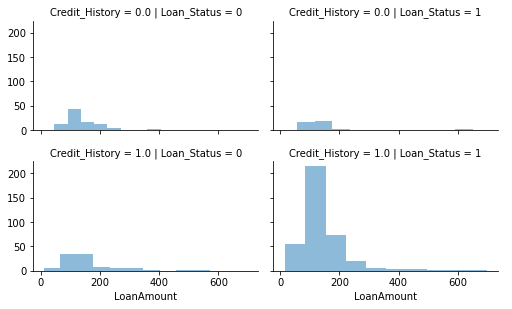

In [32]:
grid = sns.FacetGrid(datasets, row='Credit_History', col='Loan_Status', size=2.2, aspect=1.6)
grid.map(plt.hist, 'LoanAmount', alpha=.5, bins=10)
grid.add_legend()

<Figure size 1440x720 with 0 Axes>

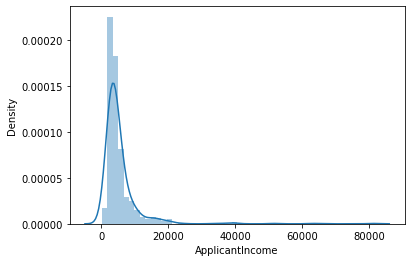

<Figure size 1440x720 with 0 Axes>

In [33]:
sns.distplot(datasets['ApplicantIncome'], fit=None);
plt.figure(figsize=(20, 10))

### Процесс записи функций

In [34]:
datasets = datasets.select_dtypes(include=['number']).copy()
datasets=pd.get_dummies(datasets,drop_first=True)

In [35]:
datasets.head()

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1.0,0.0,0.0,1,5849,0.0,128.0,360.0,1.0,1
1,1.0,1.0,1.0,1,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,3000,0.0,66.0,360.0,1.0,1
3,1.0,1.0,0.0,0,2583,2358.0,120.0,360.0,1.0,1
4,1.0,0.0,0.0,1,6000,0.0,141.0,360.0,1.0,1


In [36]:
datasets.Gender.value_counts()

1.0    502
0.0    112
Name: Gender, dtype: int64

In [37]:
datasets.head()

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1.0,0.0,0.0,1,5849,0.0,128.0,360.0,1.0,1
1,1.0,1.0,1.0,1,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,3000,0.0,66.0,360.0,1.0,1
3,1.0,1.0,0.0,0,2583,2358.0,120.0,360.0,1.0,1
4,1.0,0.0,0.0,1,6000,0.0,141.0,360.0,1.0,1


In [38]:
X = datasets.drop('Loan_Status', axis = 1).values
Y = datasets['Loan_Status'].values

In [39]:
datasets = datasets.select_dtypes(include=['number']).copy()
datasets=pd.get_dummies(datasets,drop_first=True)

datasets.head()

,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1.0,0.0,0.0,1,5849,0.0,128.0,360.0,1.0,1
1,1.0,1.0,1.0,1,4583,1508.0,128.0,360.0,1.0,0
2,1.0,1.0,0.0,1,3000,0.0,66.0,360.0,1.0,1
3,1.0,1.0,0.0,0,2583,2358.0,120.0,360.0,1.0,1
4,1.0,0.0,0.0,1,6000,0.0,141.0,360.0,1.0,1


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=13)

In [41]:
X_train.shape

(491, 9)

In [42]:
y_train.shape

(491,)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
model = Ridge()  # выбранная модель
model.fit(X_train, y_train)

Ridge()

### Перекрестная проверка

In [45]:
simple_cv = cross_val_score(model, X_train, y_train, cv=4, scoring="neg_root_mean_squared_error")
print("Cross Validation of train score: ", (-simple_cv))

Cross Validation of train score:  [0.39782025 0.45427536 0.39603708 0.43499283]


In [46]:
cross_test = cross_val_predict(model, X_test, y_test)

In [47]:
mse_test_score = cross_val_score(model, X_test, y_test, cv=4, scoring="neg_root_mean_squared_error")
print("Cross Validation test score:", (-mse_test_score))

Cross Validation test score: [0.4382392  0.50237556 0.42298351 0.511786  ]


### Гиперпараметрический процесс

In [48]:
alpha_grid = np.logspace(-32,2,30)
searcher = GridSearchCV(Ridge(), [{"alpha": alpha_grid}], scoring="neg_root_mean_squared_error", cv=4)
searcher.fit(X_train, y_train)

# plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
# plt.xscale("log")
# plt.xlabel("alpha")
# plt.ylabel("CV score")

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': array([1.00000000e-32, 1.48735211e-31, 2.21221629e-30, 3.29034456e-29,
       4.89390092e-28, 7.27895384e-27, 1.08263673e-25, 1.61026203e-24,
       2.39502662e-23, 3.56224789e-22, 5.29831691e-21, 7.88046282e-20,
       1.17210230e-18, 1.74332882e-17, 2.59294380e-16, 3.85662042e-15,
       5.73615251e-14, 8.53167852e-13, 1.26896100e-11, 1.88739182e-10,
       2.80721620e-09, 4.17531894e-08, 6.21016942e-07, 9.23670857e-06,
       1.37382380e-04, 2.04335972e-03, 3.03919538e-02, 4.52035366e-01,
       6.72335754e+00, 1.00000000e+02])}],
             scoring='neg_root_mean_squared_error')

In [49]:
best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

Best alpha = 100.0000


In [50]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Support Vector Machine",SVC()))
models.append(("K Nearest Neighbors",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

scoring='accuracy'

In [51]:
result=[]
names=[]

In [52]:
for name,model in models:
    #print(model)
    kfold=RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=12)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    print("%s %f %f" % (name,cv_result.mean(),cv_result.std()))

Logistic Regression 0.774751 0.045808
Decision Tree 0.657053 0.055739
Support Vector Machine 0.771061 0.045549
K Nearest Neighbors 0.739673 0.057717
Naive Bayes 0.751943 0.053055


In [53]:
model_accuracies = {}

### Логистическая регрессия

Train/Test split results:
LogisticRegression accuracy is 0.750
LogisticRegression log_loss is 0.558
LogisticRegression auc is 0.709


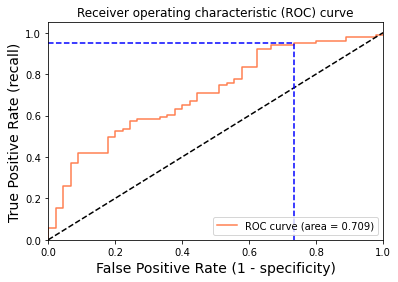

In [54]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X_train_logregr, X_test_logregr, y_train_logregr, y_test_logregr = train_test_split(X_train, y_train, test_size = 0.3, random_state=42) # уже с отобранными призаками

scaler_logregr = StandardScaler()

X_train_scaled_logregr = scaler_logregr.fit_transform(X_train_logregr)

X_test_scaled_logregr = scaler_logregr.transform(X_test_logregr)

logreg = LogisticRegression()
logreg.fit(X_train_scaled_logregr, y_train_logregr)
y_pred = logreg.predict(X_test_scaled_logregr)
y_pred_proba = logreg.predict_proba(X_test_scaled_logregr)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test_logregr, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test_logregr, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test_logregr, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95))

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### Перекрестная проверка логистической регрессии

In [55]:
logreg = LogisticRegression()
scores_accuracy = cross_val_score(logreg, X_train_scaled_logregr, y_train_logregr, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X_train_scaled_logregr, y_train_logregr, cv=5, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X_train_scaled_logregr, y_train_logregr, cv=5, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.787
LogisticRegression average log_loss is 0.534
LogisticRegression average auc is 0.735


### Гиперпараметр логистической регрессии

In [56]:
C = np.arange(0.5, 3, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()
std_scale = StandardScaler()

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=kfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

log_clf.fit(X_train, y_train)
results = log_clf.cv_results_
best_param = str(log_clf.best_params_)
best_score = log_clf.best_score_
model_accuracies['Logistic Regression'] = log_clf.score(X_test, y_test)
print("best params: ", best_param)
print('best score:', best_score)
print('Accuracy of Logistic Regression:', model_accuracies['Logistic Regression'])

best params:  {'clf__C': 0.5}
best score: 0.7747510204081632
Accuracy of Logistic Regression: 0.7479674796747967


### Классификация машин с опорным вектором

Train/Test split results:
LogisticRegression accuracy is 0.750
LogisticRegression log_loss is 0.551
LogisticRegression auc is 0.692


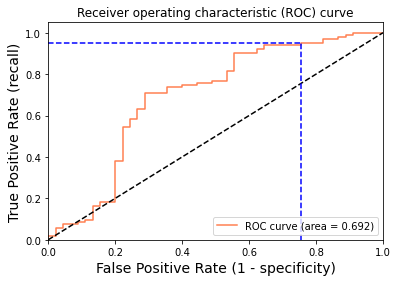

In [57]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_train, y_train, test_size = 0.3, random_state=42) 

scaler_svm = StandardScaler()

X_train_scaled_svm = scaler_svm.fit_transform(X_train_svm)

X_test_scaled_svm = scaler_svm.transform(X_test_svm)

svm = SVC()
svm.probability = True
svm.fit(X_train_scaled_svm, y_train_svm)
y_pred = svm.predict(X_test_scaled_svm)
y_pred_proba = svm.predict_proba(X_test_scaled_svm)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test_svm, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test_svm, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test_svm, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95))

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### Пользовательская конфигурация с гиперпараметром с помощью SVM

In [58]:
def svm_sgd(X_train, y_train):

    w = np.zeros(len(X_train[0]))
    learning_rate = 0.001
    epochs = 100

    for epoch in range(1,epochs):
        for i, x in enumerate(X_train):
            if (y_train[i]*np.dot(X[i], w)) < 1:
                w = w + learning_rate * ( (X_train[i] * y_train[i]) + (-2  *(1/epoch)* w) )
            else:
                w = w + learning_rate * (-2  *(1/epoch)* w)

    return w

w = svm_sgd(X_train,y_train)
print(w)

[-0.70324418  0.24514887  0.10629392  0.66664204 -0.04341767 -0.2093536
  0.05097587  1.19086234  2.89479257]


### Перекрестная проверка машины опорных векторов

In [59]:
svm = SVC()
scores_accuracy = cross_val_score(svm, X_train_scaled_svm, y_train_svm, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(svm, X_train_scaled_svm, y_train_svm, cv=5, scoring='neg_log_loss')
scores_auc = cross_val_score(svm, X_train_scaled_svm, y_train_svm, cv=5, scoring='roc_auc')
print('K-fold cross-validation results:')
print(svm.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(svm.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(svm.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
SVC average accuracy is 0.773
SVC average log_loss is nan
SVC average auc is 0.713


### Гиперпараметр машины опорных векторов

In [60]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

cv = StratifiedKFold(10)
svm = SVC(random_state=11)
grid_svm = GridSearchCV(svm, param_grid, refit = True, verbose = 3)
grid_svm.fit(X_train, y_train)
model_accuracies['SVC'] = grid_svm.score(X_test, y_test)

print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)
print("test score:", model_accuracies['SVC'])

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.677 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.684 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.768 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.724 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.745 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.735 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.724 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.677 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

### K Ближайший сосед

Train/Test split results:
KNeighborsClassifier accuracy is 0.750
KNeighborsClassifier log_loss is 3.184
KNeighborsClassifier auc is 0.641


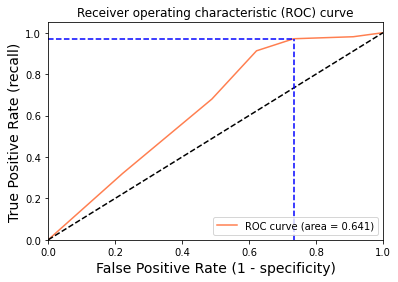

In [61]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_train, y_train, test_size = 0.3, random_state=42) 

scaler_knn = StandardScaler()

X_train_scaled_knn = scaler_knn.fit_transform(X_train_knn)

X_test_scaled_knn = scaler_knn.transform(X_test_knn)

knn = KNeighborsClassifier()
# svm.probability = True
knn.fit(X_train_scaled_knn, y_train_knn)
y_pred = knn.predict(X_test_scaled_knn)
y_pred_proba = knn.predict_proba(X_test_scaled_knn)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test_knn, y_pred_proba)
print('Train/Test split results:')
print(knn.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test_knn, y_pred))
print(knn.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test_knn, y_pred_proba))
print(knn.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95))

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### K Перекрестная проверка ближайшего соседа

In [62]:
knn = KNeighborsClassifier()
scores_accuracy = cross_val_score(knn, X_train_scaled_knn, y_train_knn, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(knn, X_train_scaled_knn, y_train_knn, cv=5, scoring='neg_log_loss')
scores_auc = cross_val_score(knn, X_train_scaled_knn, y_train_knn, cv=5, scoring='roc_auc')
print('K-fold cross-validation results:')
print(knn.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(knn.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(knn.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
KNeighborsClassifier average accuracy is 0.740
KNeighborsClassifier average log_loss is 3.302
KNeighborsClassifier average auc is 0.681


### K Гиперпараметр ближайшего соседа

In [63]:
n_neighbors = np.arange(1, 11, 2) # n_neighbors means k
weights = ['uniform', 'distance'] # weight of each neighbor

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

knn = KNeighborsClassifier() 
std_scale = StandardScaler()
knn_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',knn)])

knn_clf = GridSearchCV(estimator=knn_clf_pipe, cv=kfold,
              scoring=scoring,
              param_grid=dict(clf__n_neighbors=n_neighbors, clf__weights=weights), refit='Accuracy')

knn_clf.fit(X_train, y_train)
results = knn_clf.cv_results_

print("best estimator: " + str(knn_clf.best_estimator_))
print("best params: " + str(knn_clf.best_params_))
print('best score:', knn_clf.best_score_)
model_accuracies['KNN'] = knn_clf.score(X_test, y_test)
print("test score:", model_accuracies['KNN'])

best estimator: Pipeline(steps=[('scale', StandardScaler()),
                ('clf',
                 KNeighborsClassifier(n_neighbors=9, weights='distance'))])
best params: {'clf__n_neighbors': 9, 'clf__weights': 'distance'}
best score: 0.760873469387755
test score: 0.7398373983739838


### Наивный Байес

Train/Test split results:
GaussianNB accuracy is 0.716
GaussianNB log_loss is 0.810
GaussianNB auc is 0.705


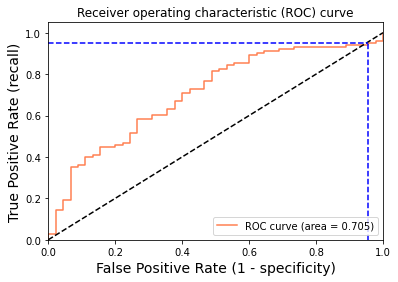

In [64]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_train, y_train, test_size = 0.3, random_state=42) 

scaler_nb = StandardScaler()

X_train_scaled_nb = scaler_nb.fit_transform(X_train_nb)

X_test_scaled_nb = scaler_nb.transform(X_test_nb)

nb = GaussianNB()

nb.fit(X_train_scaled_nb, y_train_nb)
y_pred = nb.predict(X_test_scaled_nb)
y_pred_proba = nb.predict_proba(X_test_scaled_nb)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test_nb, y_pred_proba)
print('Train/Test split results:')
print(nb.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test_nb, y_pred))
print(nb.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test_nb, y_pred_proba))
print(nb.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95))

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### Наивная Байесовская перекрестная проверка

In [65]:
nb = GaussianNB()
scores_accuracy = cross_val_score(nb, X_train_scaled_nb, y_train_nb, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(nb, X_train_scaled_nb, y_train_nb, cv=5, scoring='neg_log_loss')
scores_auc = cross_val_score(nb, X_train_scaled_knn, y_train_nb, cv=5, scoring='roc_auc')
print('K-fold cross-validation results:')
print(nb.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(nb.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(nb.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
GaussianNB average accuracy is 0.755
GaussianNB average log_loss is 0.955
GaussianNB average auc is 0.699


### Наивный байесовский гиперпараметр

In [66]:
priors = [None, [0.62, 0.38]]
var_smoothing = np.logspace(0, -9, num=100) # portion of the largest variance of all features that is added to variances for calculation stability

scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

nb = GaussianNB()  

std_scale = StandardScaler()

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=23)

nb_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',nb)])

nb_clf = GridSearchCV(estimator=nb_clf_pipe, cv=rskfold,
              scoring=scoring,
              param_grid=dict(clf__priors=priors, clf__var_smoothing=var_smoothing), refit='Accuracy')

nb_clf.fit(X_train, y_train)
results = nb_clf.cv_results_

print("best params: " + str(nb_clf.best_params_))
print('best score:', nb_clf.best_score_)
model_accuracies['Naive Bayes'] = nb_clf.score(X_test, y_test)
print("test score:", model_accuracies['Naive Bayes'])

best params: {'clf__priors': None, 'clf__var_smoothing': 0.2848035868435802}
best score: 0.7621232735518452
test score: 0.7560975609756098


### Дерево решений

Train/Test split results:
DecisionTreeClassifier accuracy is 0.669
DecisionTreeClassifier log_loss is 11.435
DecisionTreeClassifier auc is 0.593


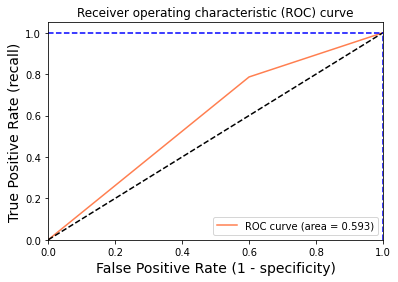

In [67]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_train, y_train, test_size = 0.3, random_state=42) 

scaler_dt = StandardScaler()

X_train_scaled_dt = scaler_dt.fit_transform(X_train_dt)

X_test_scaled_dt = scaler_dt.transform(X_test_dt)

dt = DecisionTreeClassifier()

dt.fit(X_train_scaled_dt, y_train_dt)
y_pred = dt.predict(X_test_scaled_dt)
y_pred_proba = dt.predict_proba(X_test_scaled_dt)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test_dt, y_pred_proba)
print('Train/Test split results:')
print(dt.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test_dt, y_pred))
print(dt.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test_dt, y_pred_proba))
print(dt.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95))

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

### Перекрестная проверка дерева решений

In [68]:
dt = DecisionTreeClassifier()
scores_accuracy = cross_val_score(dt, X_train_scaled_dt, y_train_dt, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(dt, X_train_scaled_dt, y_train_dt, cv=5, scoring='neg_log_loss')
scores_auc = cross_val_score(dt, X_train_scaled_dt, y_train_dt, cv=5, scoring='roc_auc')
print('K-fold cross-validation results:')
print(dt.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(dt.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(dt.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
DecisionTreeClassifier average accuracy is 0.650
DecisionTreeClassifier average log_loss is 11.579
DecisionTreeClassifier average auc is 0.608


### Гиперпараметр дерева решений

In [69]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)
model_accuracies['Decision Tree'] = grid_search_cv.score(X_test, y_test)

print("best score: ", grid_search_cv.best_score_)
print("best param: ", grid_search_cv.best_params_)
print("test score:", model_accuracies['Decision Tree'])

Fitting 3 folds for each of 294 candidates, totalling 882 fits
best score:  0.775961394583271
best param:  {'max_leaf_nodes': 2, 'min_samples_split': 2}
test score: 0.7479674796747967


### Регрессия случайного леса

Train/Test split results:
Random Forest Classification accuracy:  0.7027027027027027


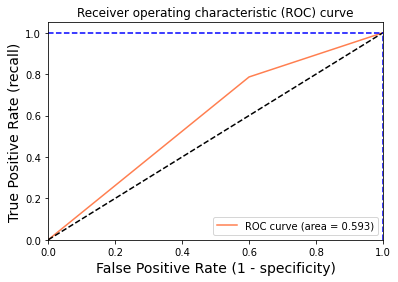

In [70]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from collections import Counter
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
        
    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None, n_estimators=20):
        self.n_trees = n_trees
        self.max_depth=max_depth
        self.min_samples_split=min_samples_split
        self.n_features=n_feature
        self.trees = []
        self.n_estimators = n_estimators

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(max_depth=self.max_depth,
                            min_samples_split=self.min_samples_split,
                            n_features=self.n_features)
            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(predictions, 0, 1)
        predictions = np.array([self._most_common_label(pred) for pred in tree_preds])
        return predictions
    
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_train, y_train, test_size = 0.3, random_state=42)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

clf = RandomForest(n_trees=10)
clf.fit(X_train_rf, y_train_rf)
predictions = clf.predict(X_test_rf)

acc =  accuracy(y_test_rf, predictions)
[fpr, tpr, thr] = roc_curve(y_test_rf, y_pred_proba)
print('Train/Test split results:')
print("Random Forest Classification accuracy: ", acc)

idx = np.min(np.where(tpr > 0.95))

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [71]:
# from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
# from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# X_train_rfc, X_test_rfc, y_train_rfc, y_test_rfc = train_test_split(X_train, y_train, test_size = 0.3, random_state=42) 

# scaler_rfc = StandardScaler()

# X_train_scaled_rfc = scaler_rfc.fit_transform(X_train_rfc)

# X_test_scaled_rfc = scaler_rfc.transform(X_test_rfc)

# rfc = RandomForestClassifier()

# rfc.fit(X_train_scaled_rfc, y_train_rfc)
# y_pred = rfc.predict(X_test_scaled_rfc)
# y_pred_proba = rfc.predict_proba(X_test_scaled_rfc)[:, 1]
# [fpr, tpr, thr] = roc_curve(y_test_rfc, y_pred_proba)
# print('Train/Test split results:')
# print(rfc.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test_rfc, y_pred))
# print(rfc.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test_rfc, y_pred_proba))
# print(rfc.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

# idx = np.min(np.where(tpr > 0.95))

# plt.figure()
# plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
# plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
# plt.ylabel('True Positive Rate (recall)', fontsize=14)
# plt.title('Receiver operating characteristic (ROC) curve')
# plt.legend(loc="lower right")
# plt.show()

### Перекрестная проверка регрессии случайного леса

In [72]:
rfc = RandomForestClassifier()
scores_accuracy = cross_val_score(rfc, X_train_rf, y_train_rf, cv=5, scoring='accuracy')
scores_log_loss = cross_val_score(rfc, X_train_rf, y_train_rf, cv=5, scoring='neg_log_loss')
scores_auc = cross_val_score(rfc, X_train_rf, y_train_rf, cv=5, scoring='roc_auc')
print('K-fold cross-validation results:')
print(rfc.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(rfc.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(rfc.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
RandomForestClassifier average accuracy is 0.764
RandomForestClassifier average log_loss is 0.550
RandomForestClassifier average auc is 0.756


### Гиперпараметры регрессии случайного леса

In [73]:
classifier = RandomForestClassifier(n_estimators=20)
classifier.fit(X_train,y_train)
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators':[10,20,30,40,50,60,70],
               'max_depth': [3,4,5,7],
               'criterion':['entropy'],
               'min_samples_split':[5,4,6,7,8],
               'max_features':['auto', 'sqrt', 'log2']
               }]
grid_search = GridSearchCV(estimator= classifier,
                           param_grid= parameters,
                           scoring = 'accuracy',
                           n_jobs = -1,
                           cv = 10)

grid_search.fit(X_train,y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
model_accuracies['Random Forest Regression'] = grid_search.score(X_test, y_test)
print("Best Accuracy:", best_accuracy)
print("Best Parameters:", best_parameters)
print("Accuracy of Random Forest Regression", model_accuracies['Random Forest Regression'])

Best Accuracy: 0.7757959183673468
Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'min_samples_split': 6, 'n_estimators': 30}
Accuracy of Random Forest Regression 0.7479674796747967


### Результаты

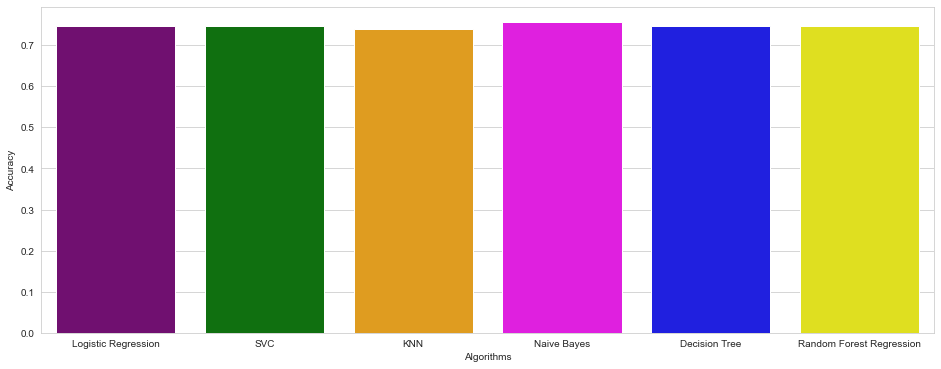

In [74]:
colors = ["purple", "green", "orange", "magenta", "blue","yellow"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))
plt.yticks(np.arange(0, 1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()), palette=colors)
plt.show()

In [75]:
# Logisic Regression confusion matrix
LogisticRegress= LogisticRegression()
LogisticRegress.fit(X_train,y_train)
pred=LogisticRegress.predict(X_test)
lr_cm = confusion_matrix(y_test,pred)
# SVM confusion matrix
svc= SVC()
svc.fit(X_train,y_train)
pred=svc.predict(X_test)
svm_cm = confusion_matrix(y_test,pred)
# KNN Confusion Matrix
Compare_Knn= KNeighborsClassifier()
Compare_Knn.fit(X_train,y_train)
pred=Compare_Knn.predict(X_test)
knn_cm = confusion_matrix(y_test,pred)
# Naive Bayes Confusion Matrix
Compare_Gaussian= GaussianNB()
Compare_Gaussian.fit(X_train,y_train)
pred=Compare_Gaussian.predict(X_test)
nb_cm = confusion_matrix(y_test,pred)
# Decision Tree Confusion Matrix
Compare_DecisionTree= DecisionTreeClassifier()
Compare_DecisionTree.fit(X_train,y_train)
pred=Compare_DecisionTree.predict(X_test)
dt_cm = confusion_matrix(y_test,pred)
# Random Forest Confusion Matrix
Compare_RandomForest= RandomForest()
Compare_RandomForest.fit(X_train,y_train)
pred=Compare_RandomForest.predict(X_test)
rfc_cm = confusion_matrix(y_test,pred)

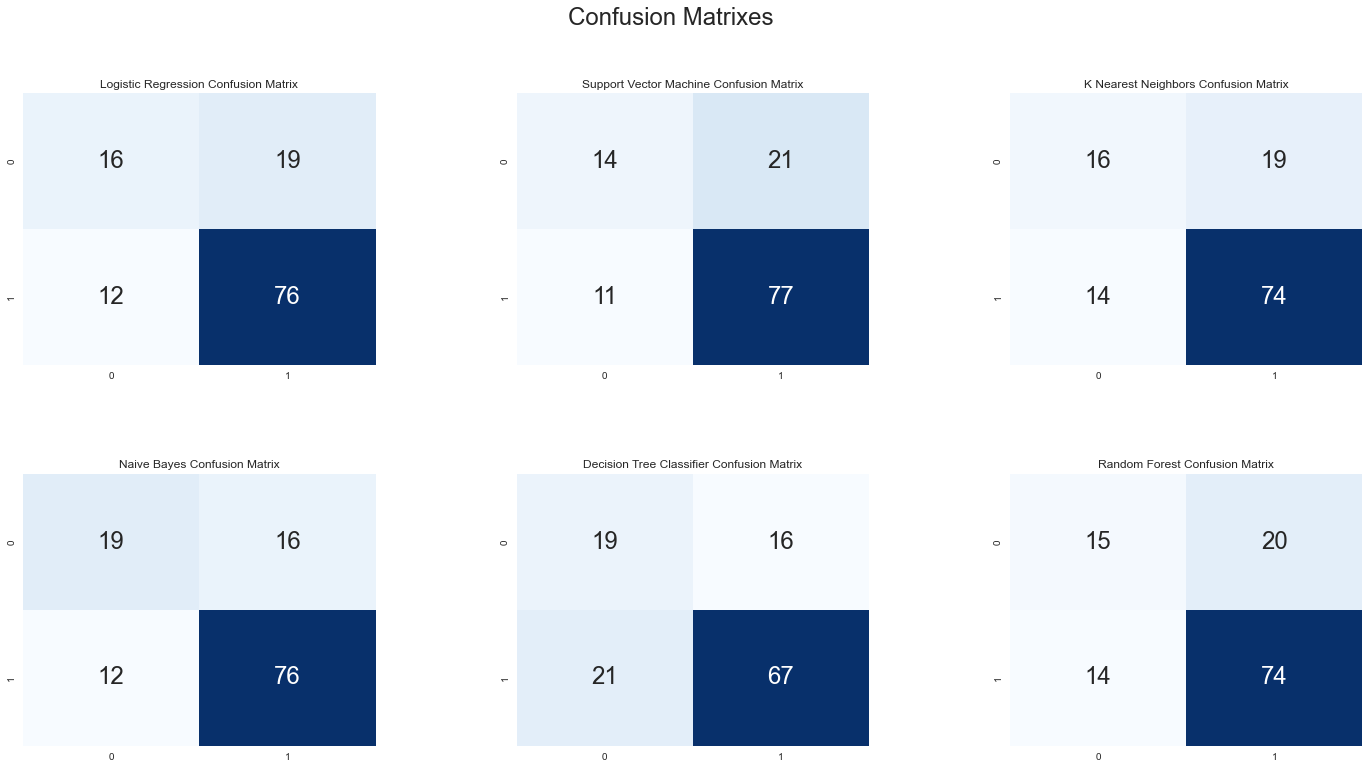

In [76]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrixes", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(svm_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(knn_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(nb_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(dt_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(rfc_cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()